Assume that in a population of 100 individuals, the initial
number of infected patients is I0 = 3 and that the contagiousness parameter is β = 0.02.
Model the epidemic over a course of one year

# 1.1

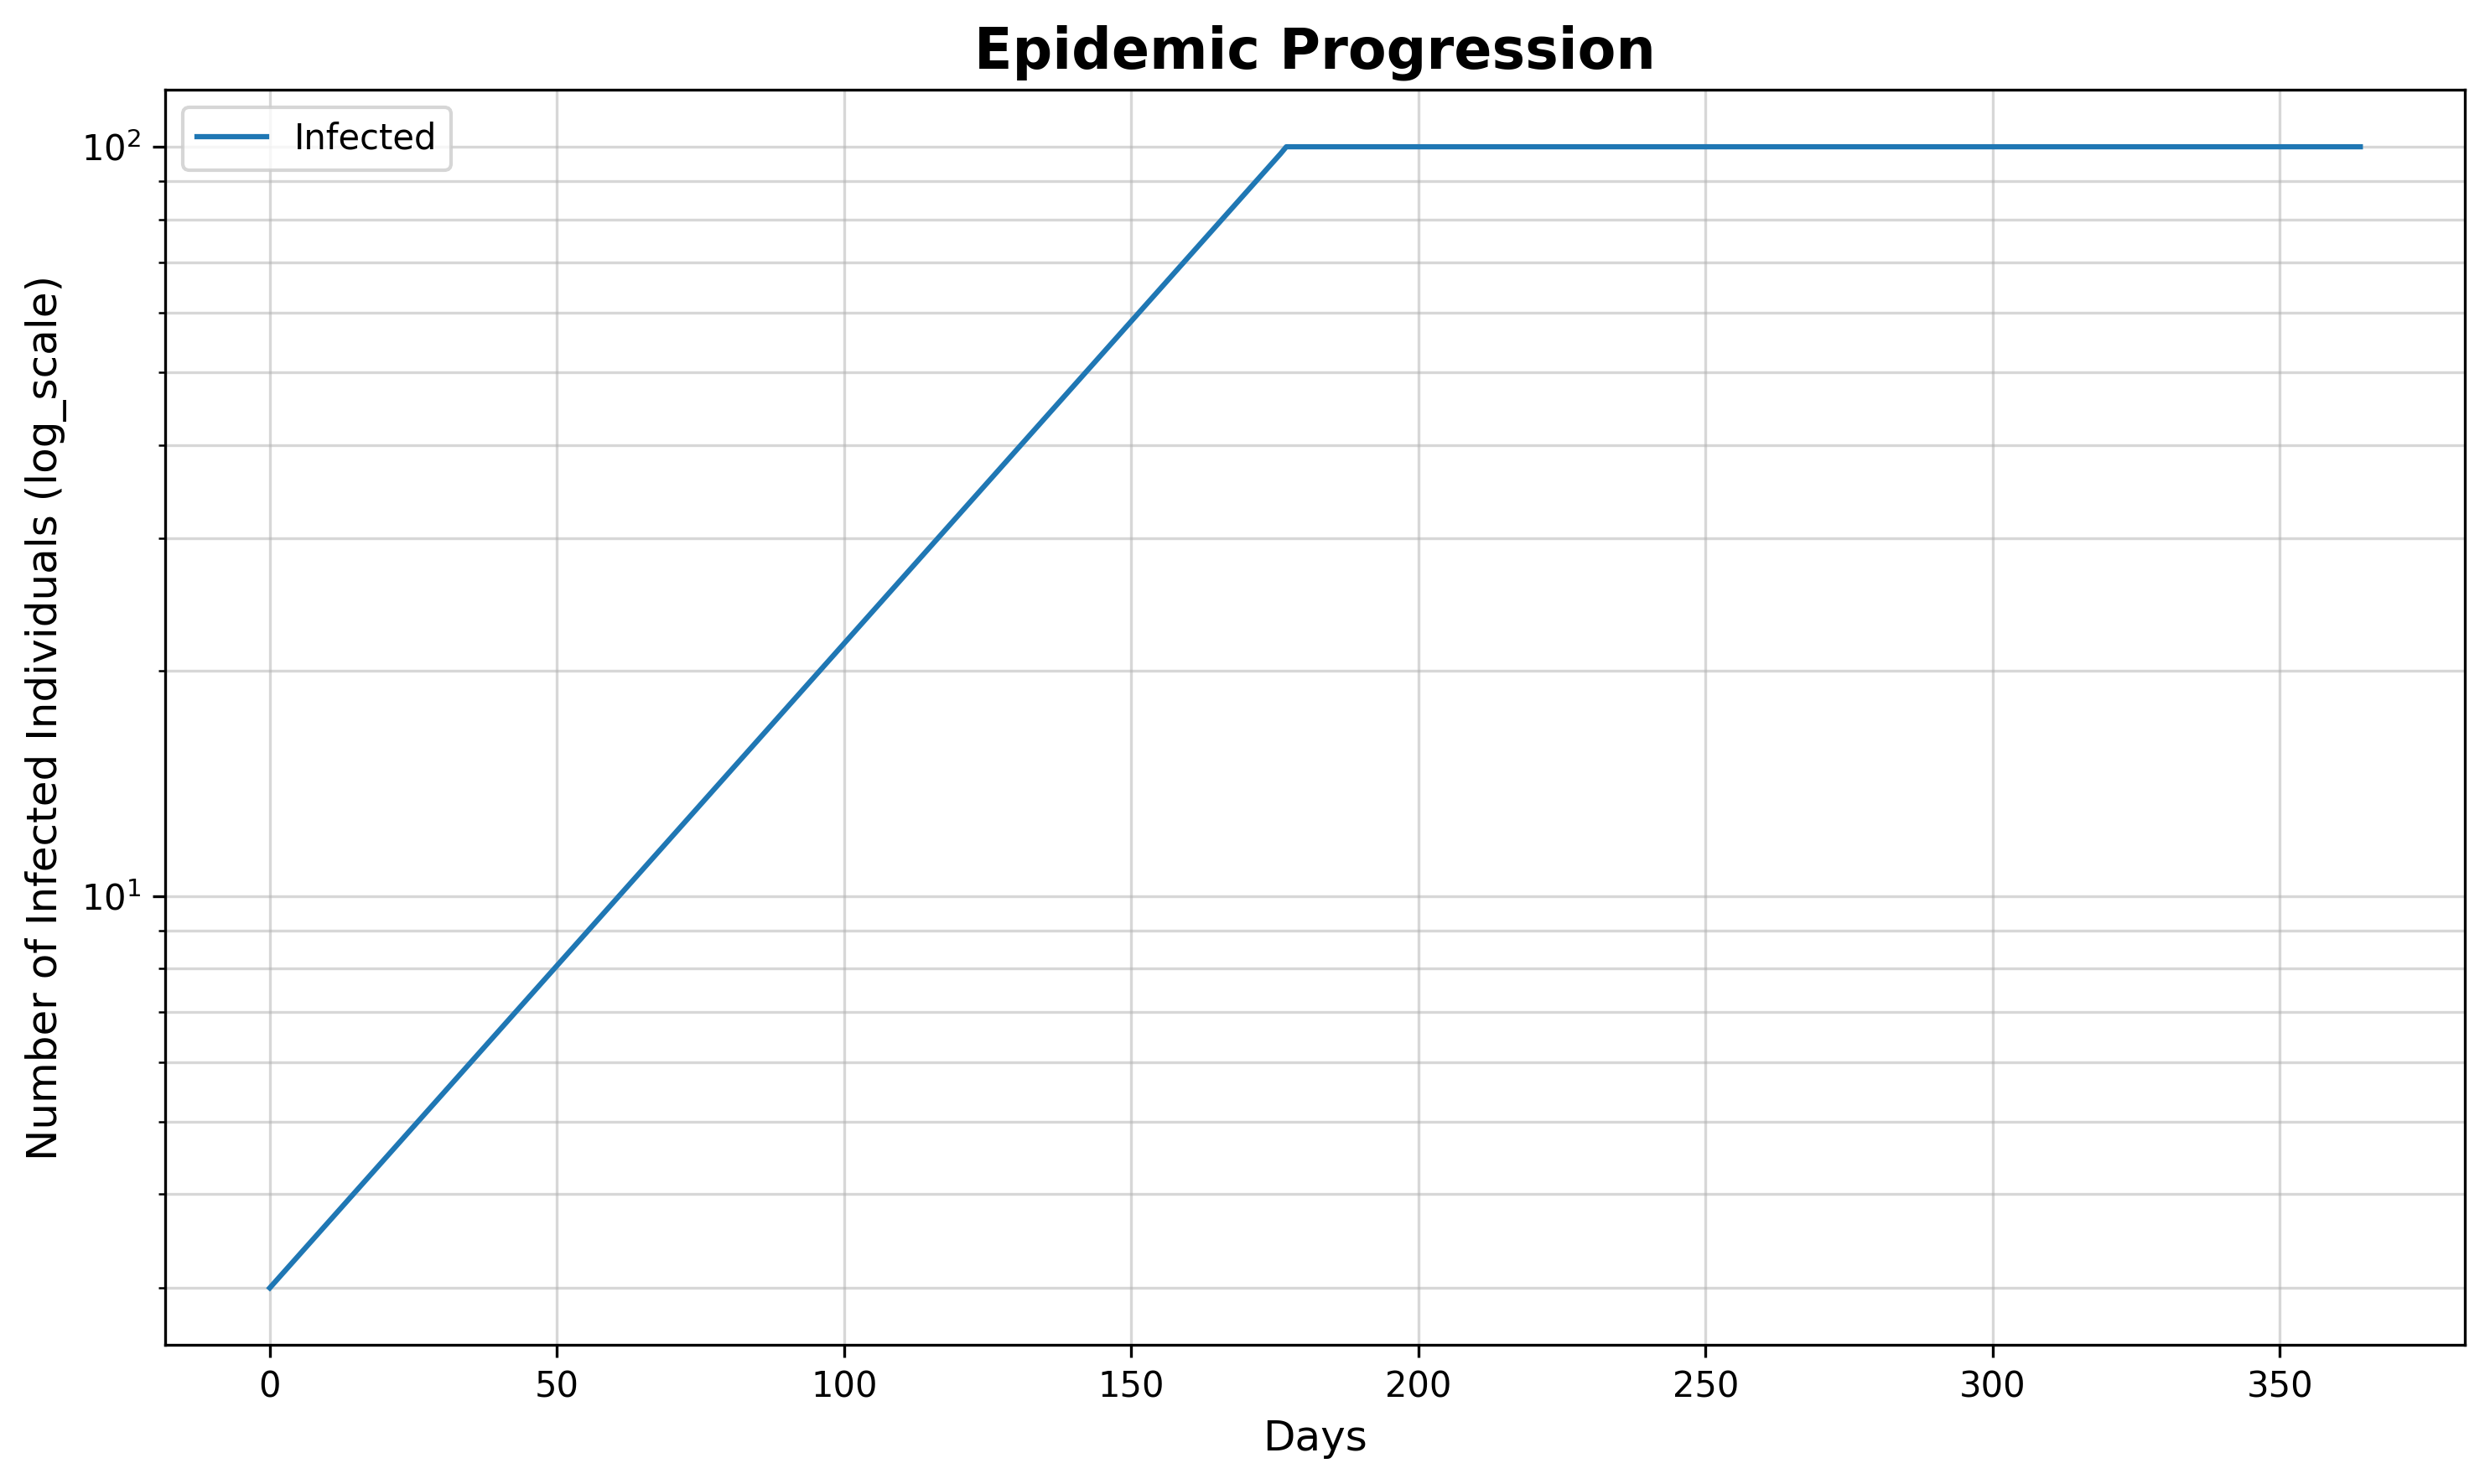

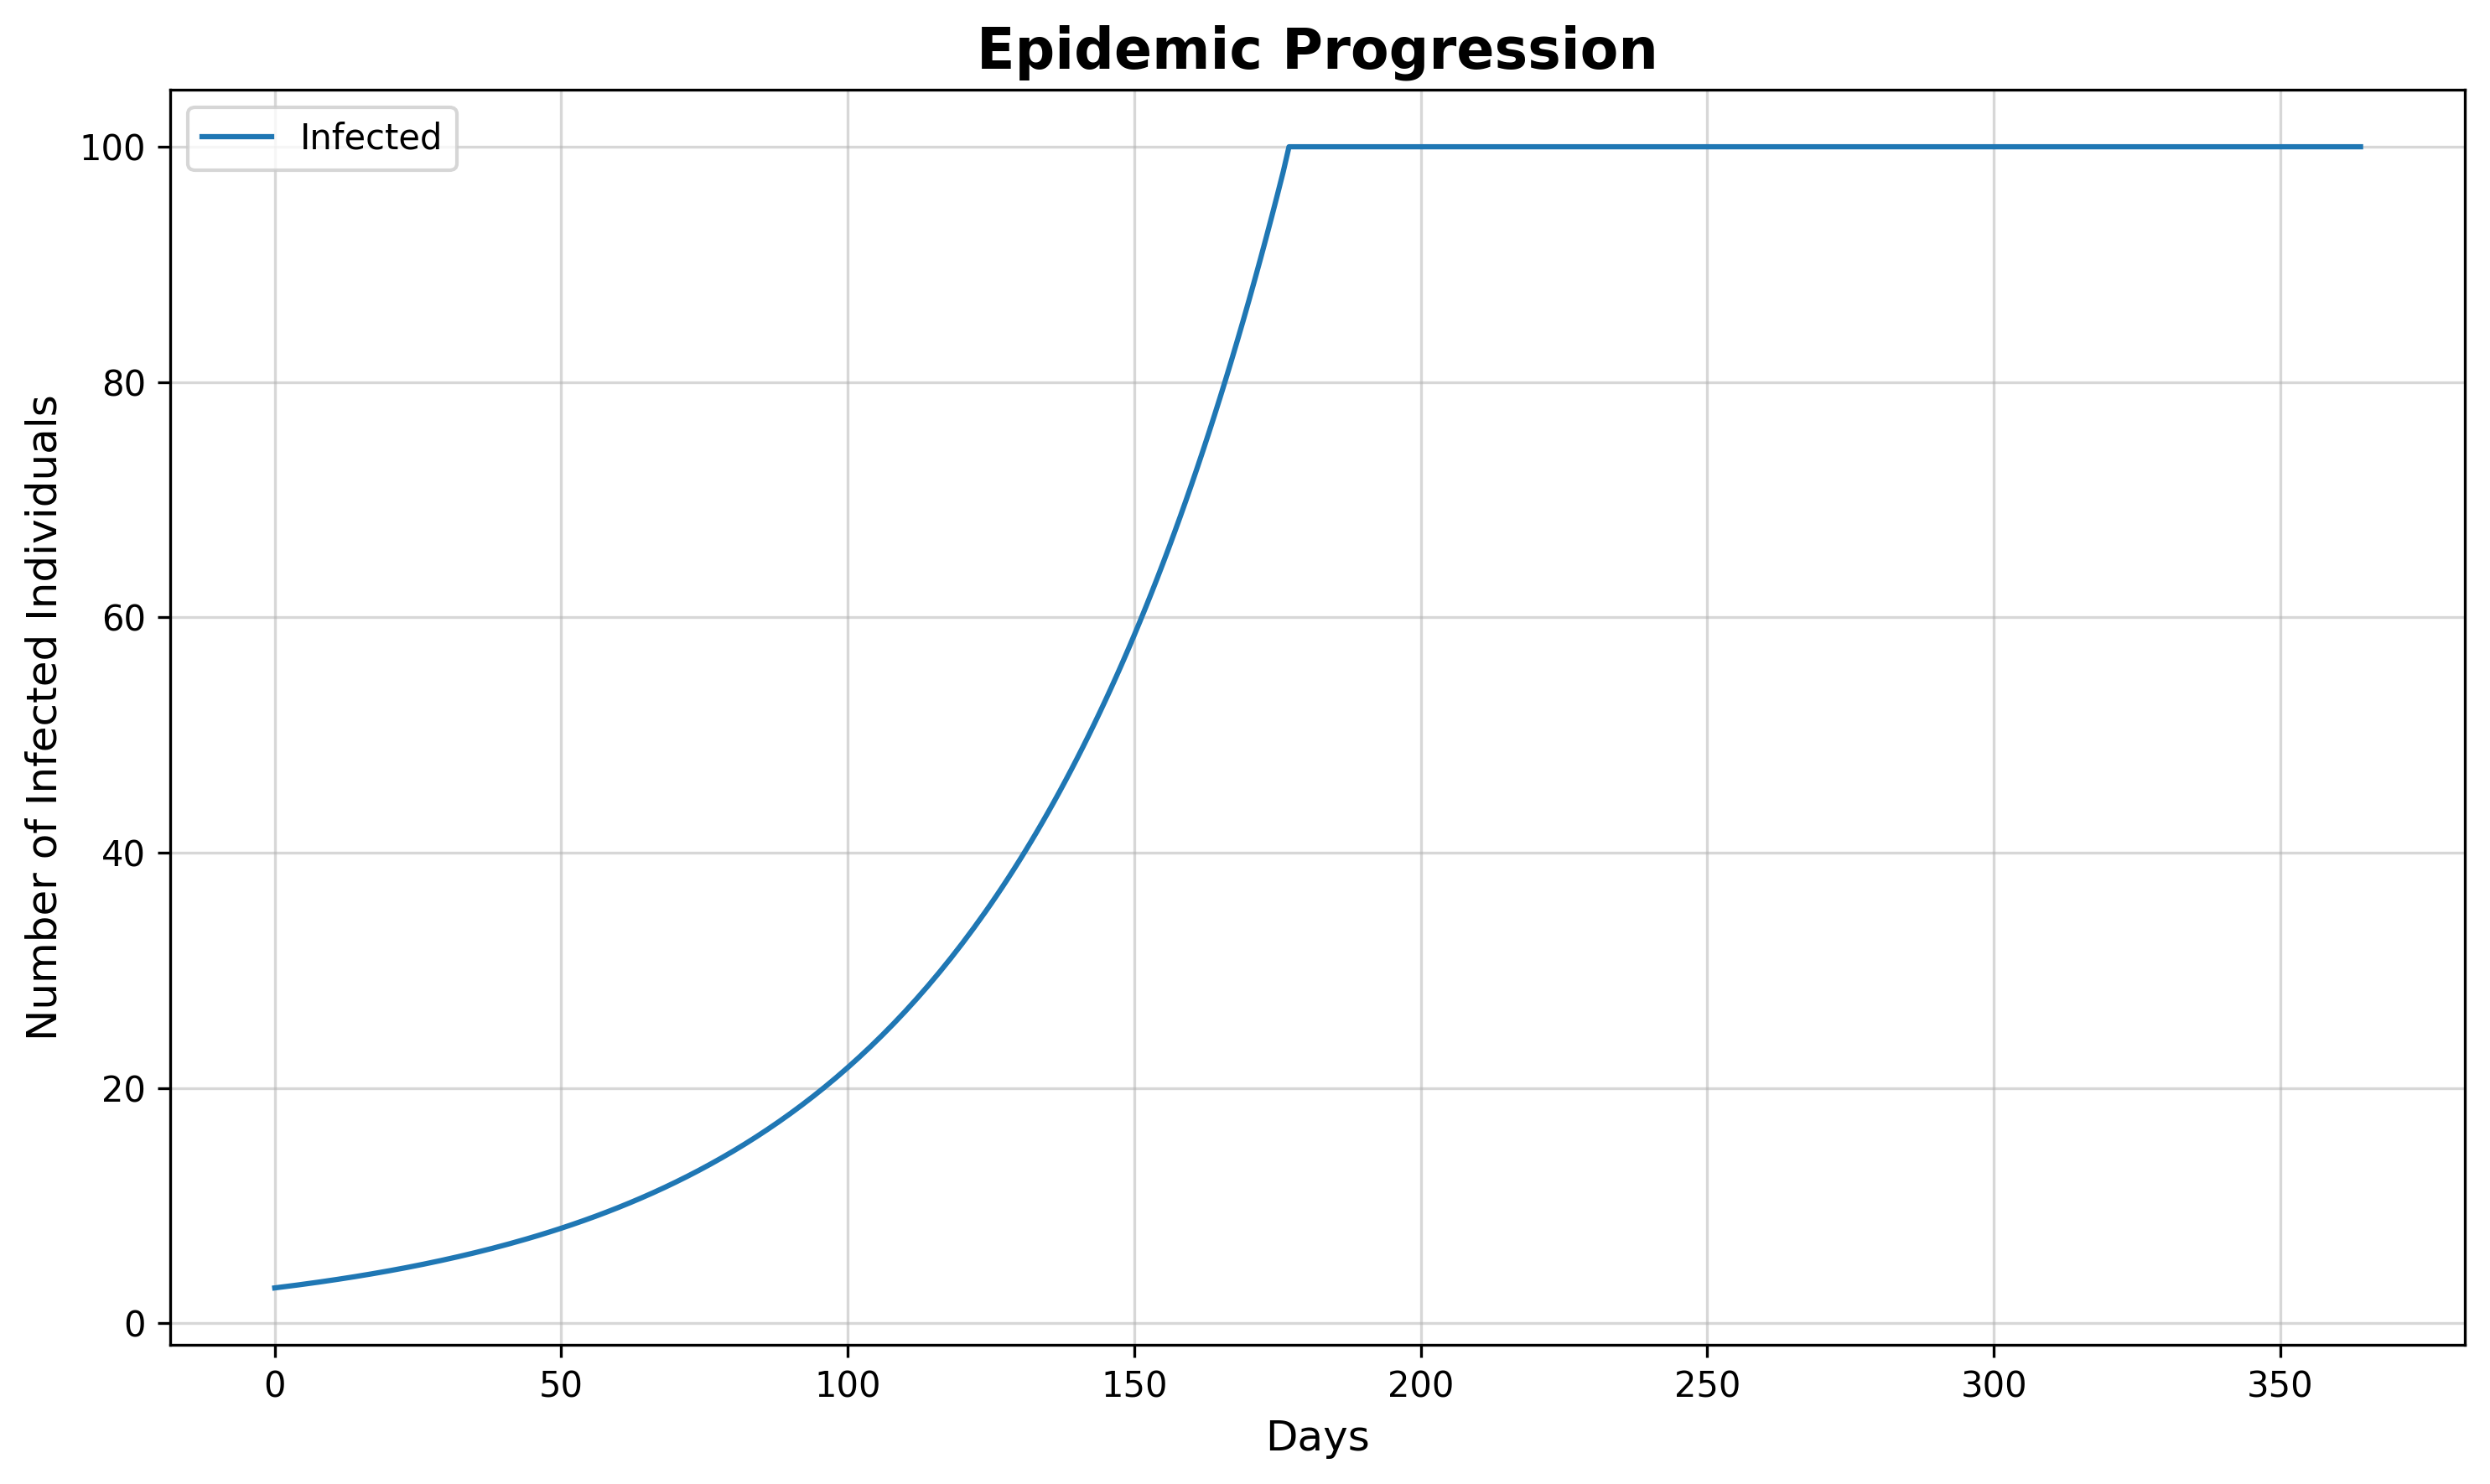

In [9]:
import numpy as np
import matplotlib.pyplot as plt

days=np.zeros(365)

I_0=3
beta=0.02
S=100
N=100
I = []
for i in range(len(days)):

  if I_0 + I_0*beta < 100:
    I.append(I_0)
  if I_0 + I_0*beta>= 100:
    I.append(100)
  if np.isclose(int(I_0), int(S)):
    print(i)
  I_0= I_0 + I_0*beta
  S=N-I_0
  days[i]=i

# Create the plot with improved styling
plt.figure(figsize=(10, 6), dpi=300)
plt.semilogy(days, I)

# Styling
plt.title('Epidemic Progression', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Infected Individuals (log_scale)', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend(['Infected'], loc='upper left')

# Add some padding
plt.tight_layout()

# Show the plot
plt.show()



# Create the plot with improved styling
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(days, I)

# Styling
plt.title('Epidemic Progression', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Infected Individuals', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend(['Infected'], loc='upper left')

# Add some padding
plt.tight_layout()

# Show the plot
plt.show()

# 1.2

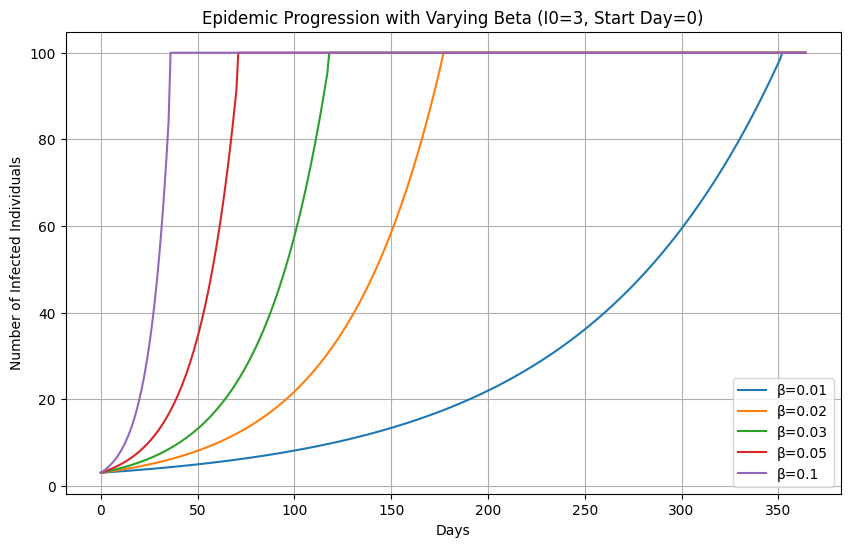

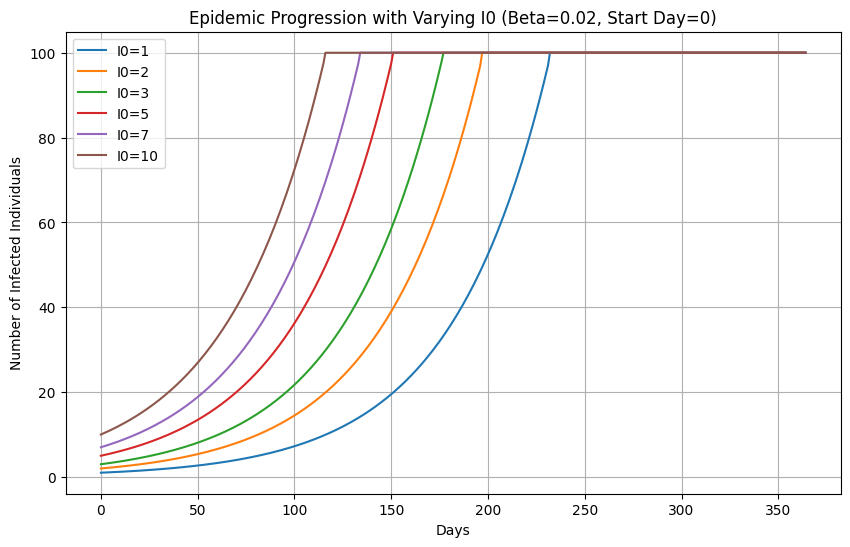

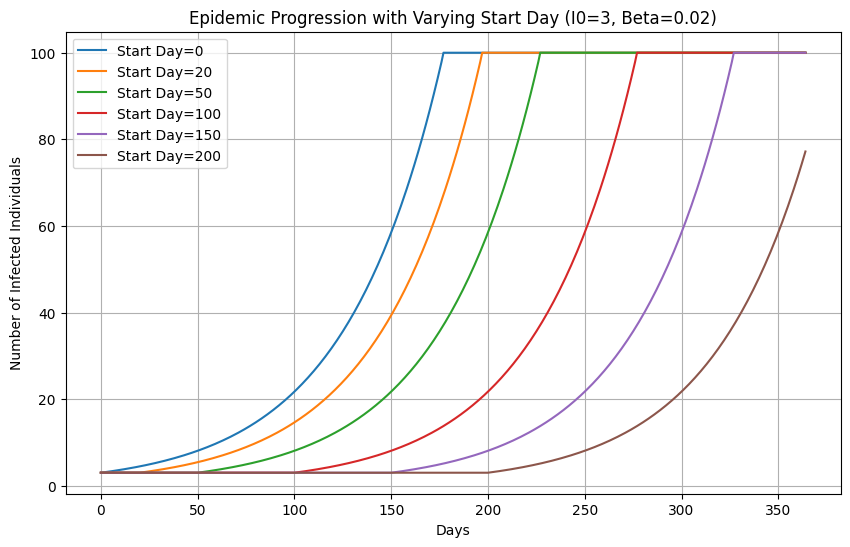

In [10]:
def simulate_epidemic(I0, beta, days_to_simulate, first_infection_day):

    days = np.arange(days_to_simulate)
    I = []
    I_current = I0

    for i in range(days_to_simulate):

      if first_infection_day > i:
        I.append(I0)
      else:
        if I_current + I_current*beta < 100:
          I.append(I_current)
        if I_current + I_current*beta>= 100:
          I.append(100)


        I_current = I_current + I_current*beta
    return days, I

# Vary parameters
I0_values = [1, 2, 3, 5, 7, 10]
beta_values = [0.01, 0.02, 0.03, 0.05, 0.1]
first_infection_days = [0, 20, 50, 100, 150, 200] # Example different starting days

days_to_simulate = 365

# --- Varying Beta ---
plt.figure(figsize=(10, 6))
for beta in beta_values:
    days, I = simulate_epidemic(I0=3, beta=beta, days_to_simulate=365, first_infection_day=0)
    label = f'β={beta}'
    plt.plot(days, I, label=label)

plt.title('Epidemic Progression with Varying Beta (I0=3, Start Day=0)')
plt.xlabel('Days')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.grid(True)
plt.show()

# --- Varying Initial Infected (I0) ---
plt.figure(figsize=(10, 6))
for I0 in I0_values:
    days, I = simulate_epidemic(I0=I0, beta=0.02, days_to_simulate=365, first_infection_day=0)
    label = f'I0={I0}'
    plt.plot(days, I, label=label)

plt.title('Epidemic Progression with Varying I0 (Beta=0.02, Start Day=0)')
plt.xlabel('Days')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.grid(True)
plt.show()

# --- Varying First Infection Day ---
plt.figure(figsize=(10, 6))
for first_infection_day in first_infection_days:
    days, I = simulate_epidemic(I0=3, beta=0.02, days_to_simulate=365, first_infection_day=first_infection_day)
    label = f'Start Day={first_infection_day}'
    plt.plot(days, I, label=label)

plt.title('Epidemic Progression with Varying Start Day (I0=3, Beta=0.02)')
plt.xlabel('Days')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.grid(True)
plt.show()

# 1.3

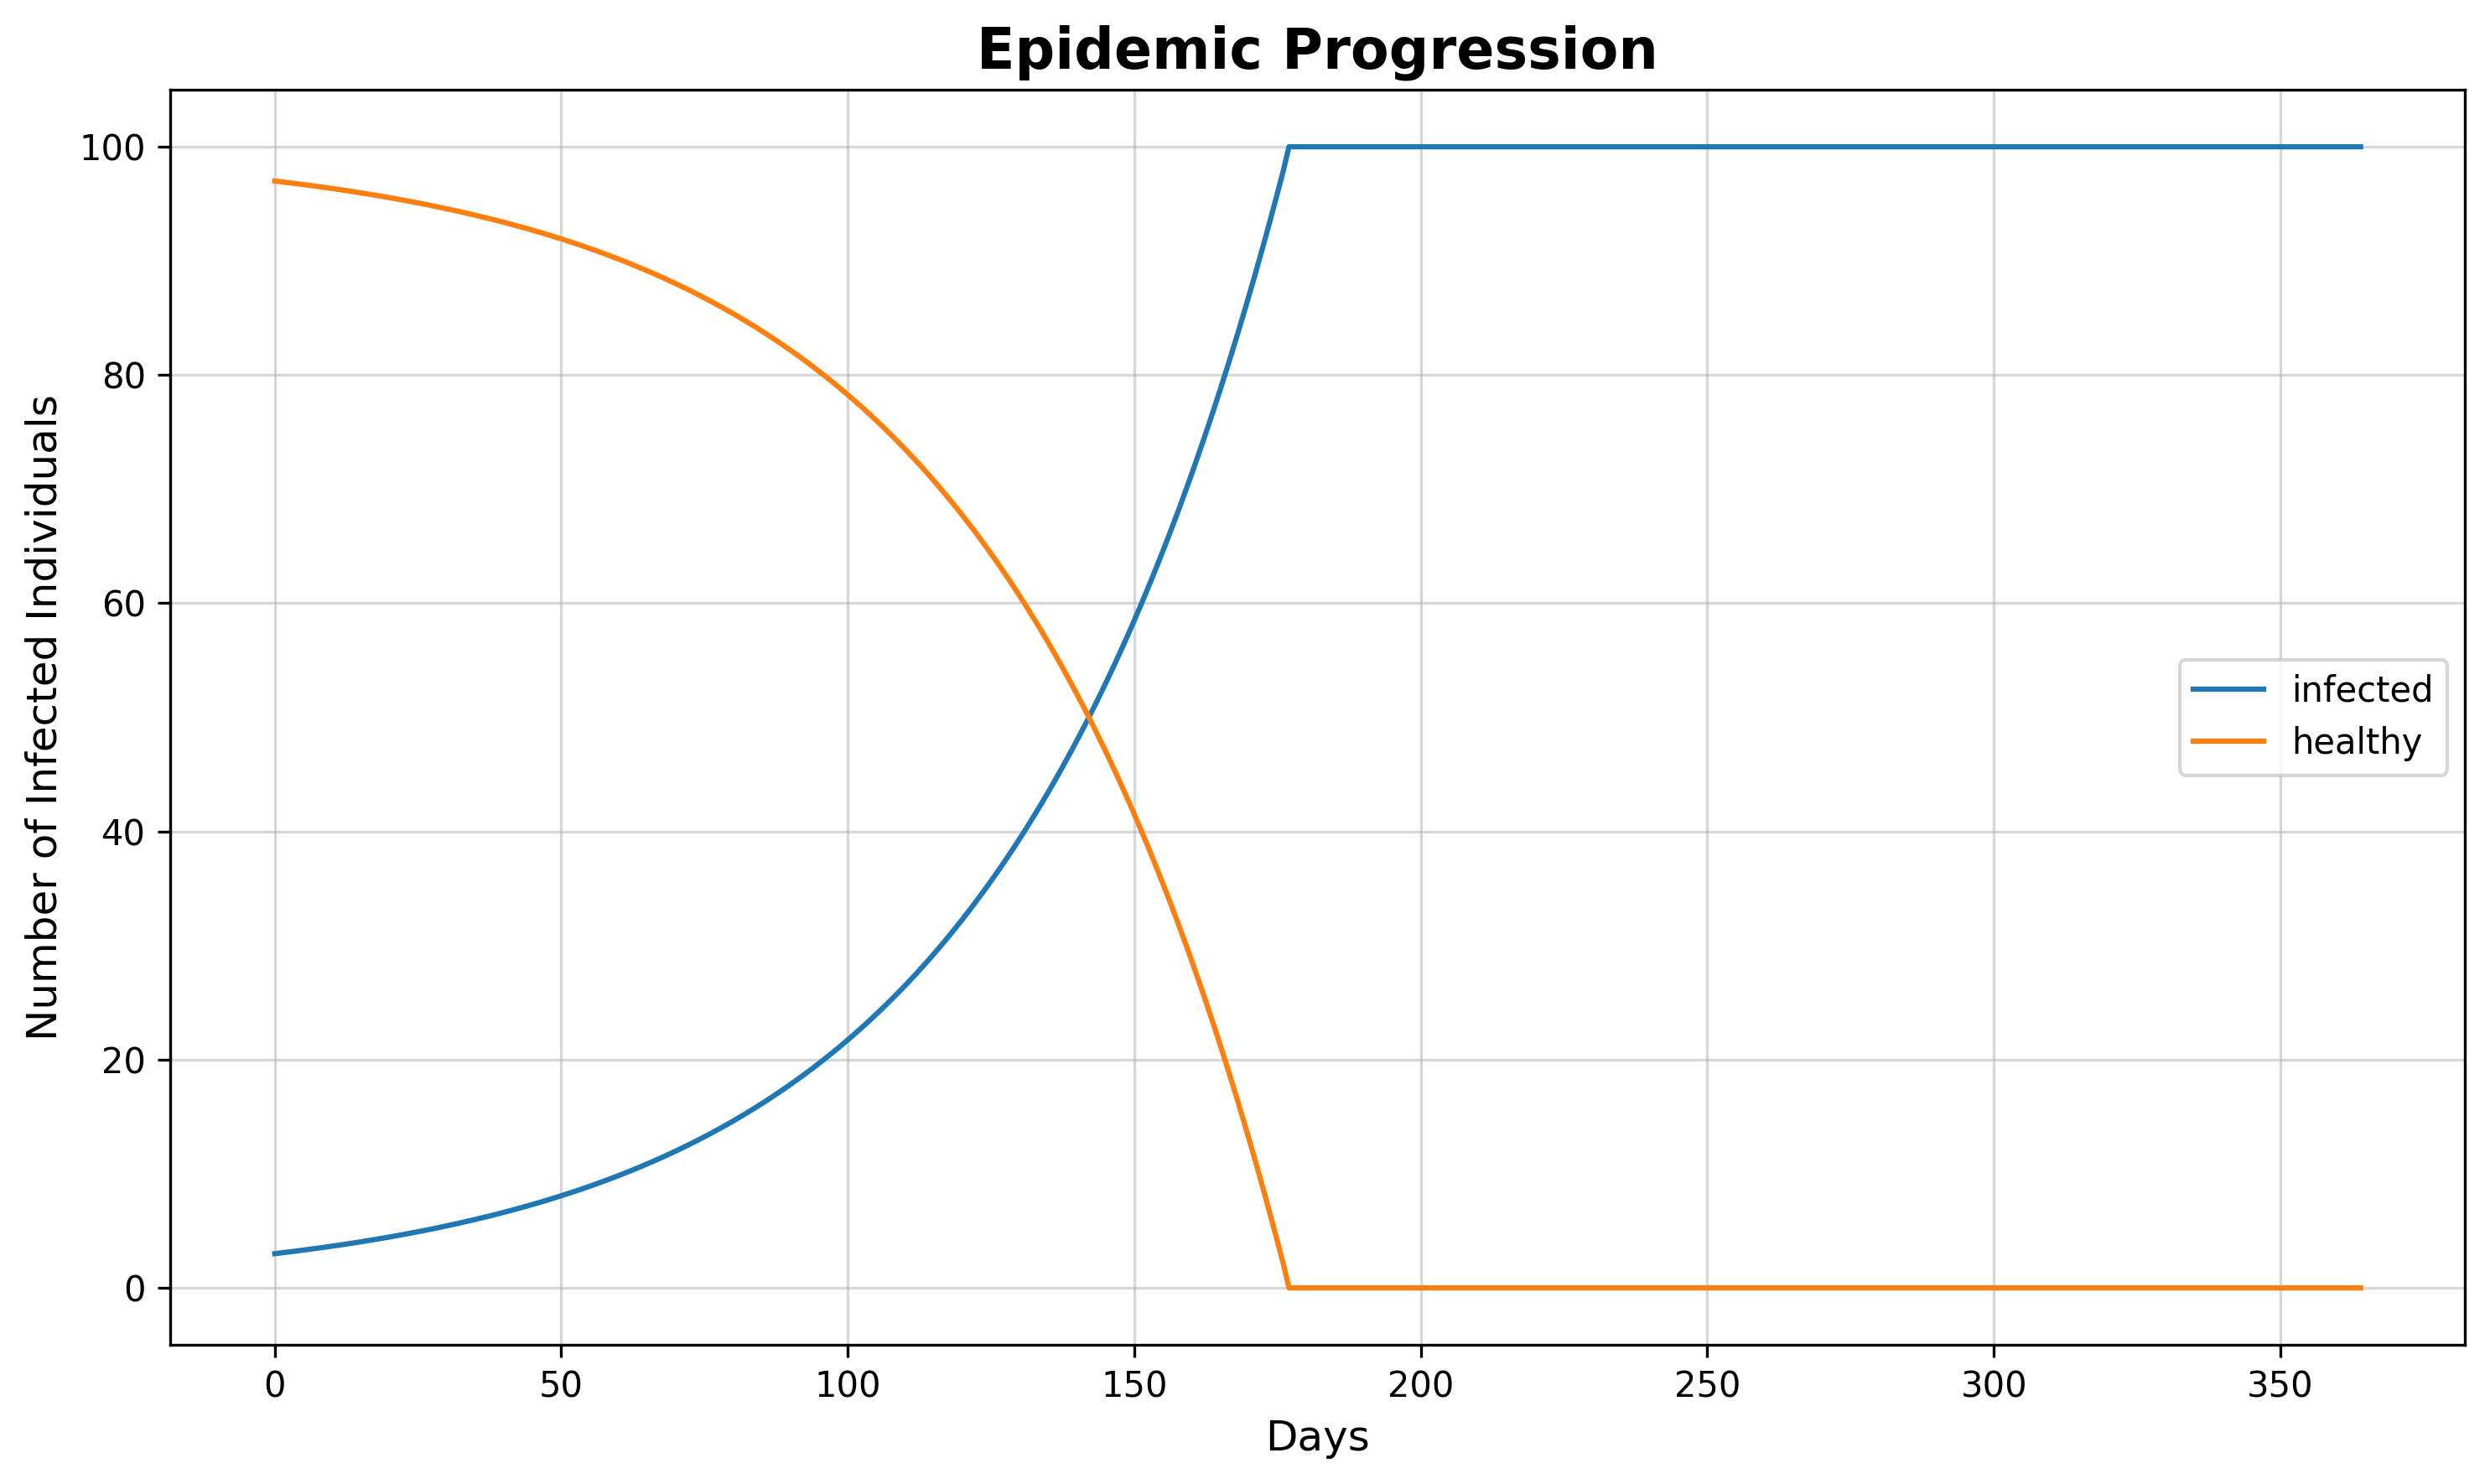

In [11]:
days=np.zeros(365)

I_0=3
beta=0.02

I = []

S=[]

N=100

for i in range(len(days)):

  if I_0 + I_0*beta < 100:
    I.append(I_0)
    S.append(N-I_0)

  if I_0 + I_0*beta>= 100:
    I.append(100)
    S.append(0)


  I_0= I_0 + I_0*beta

  days[i]=i



# Create the plot with improved styling
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(days, I, label = "infected")
plt.plot(days, S, label = "healthy")


# Styling
plt.title('Epidemic Progression', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Infected Individuals', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()

# Add some padding
plt.tight_layout()

# Show the plot
plt.show()



# 1.4


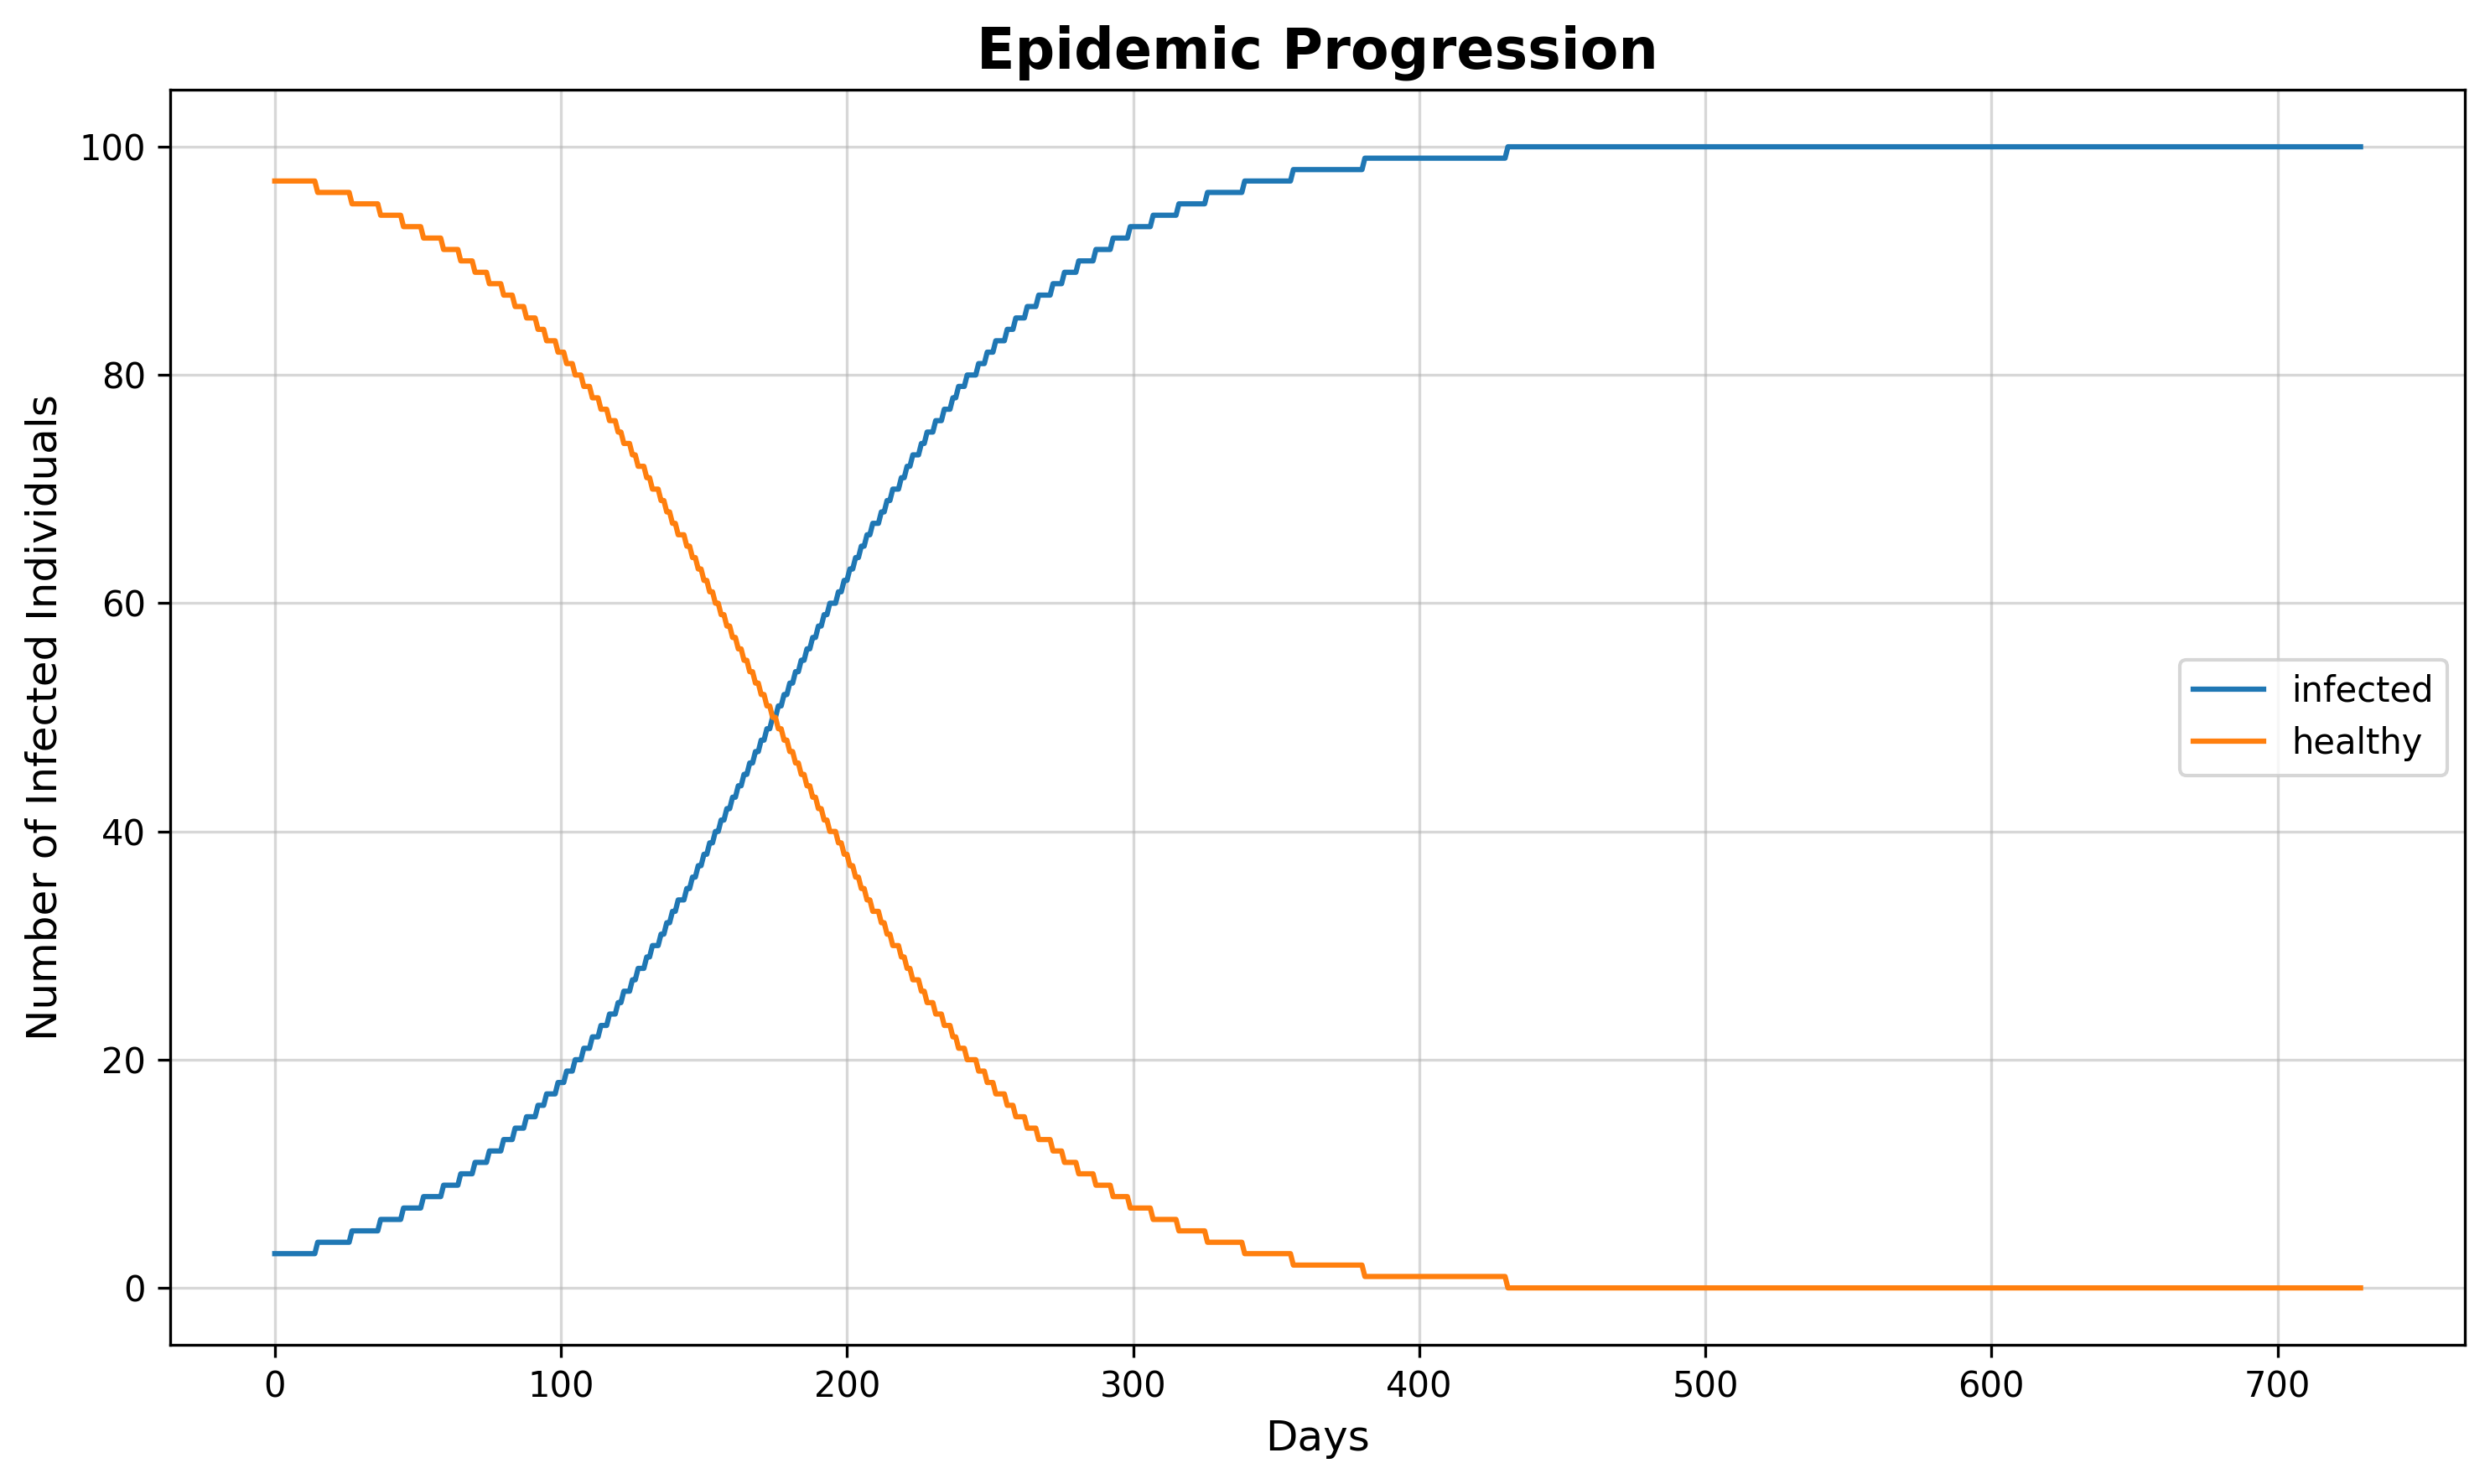

[174, 175]


In [12]:
days=np.zeros(365*2)

I_0=3
beta=0.02

I = []

S=[]

N=100

for i in range(len(days)):

  if I_0 < 100:
    I.append(int(I_0))
    S.append(N-int(I_0))

  if I_0 >= 100:
    I.append(100)
    S.append(0)


  I_0 = I_0 + I_0*beta*S[i]/N
  days[i]=i



# Create the plot with improved styling
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(days, I, label = "infected")
plt.plot(days, S, label = "healthy")


# Styling
plt.title('Epidemic Progression', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Infected Individuals', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()

# Add some padding
plt.tight_layout()

# Show the plot
plt.show()

matching_indices = [i for i in range(len(I)) if I[i] == S[i]]

print(matching_indices)

# 1.5 sigmoid shape with beta < 0.0225 , and then exponential after. Beta is the transmission parameter, if there are not enough infected people the growth is very slow and takes a long time to reach everybody. Even more, the growth is impeded and stagnates, you cannot infect everybody because of low transmission, so the curve plateaus.

# The same is true for the amount of initial infected people, if infected initial <= 3, we have a sigmoidal regime, after there is an exponential regime. Indeed, I_0 determnines how many people the virus will be able to spread to, it determines the genesis and exponetial capacity of the population, we can infer that there is a limit at which the virus will be able to exponentially spread in the population.


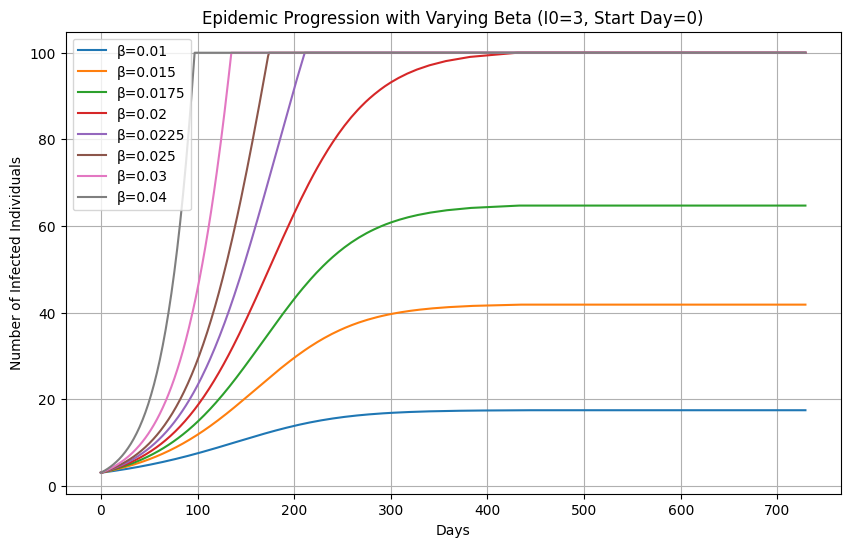

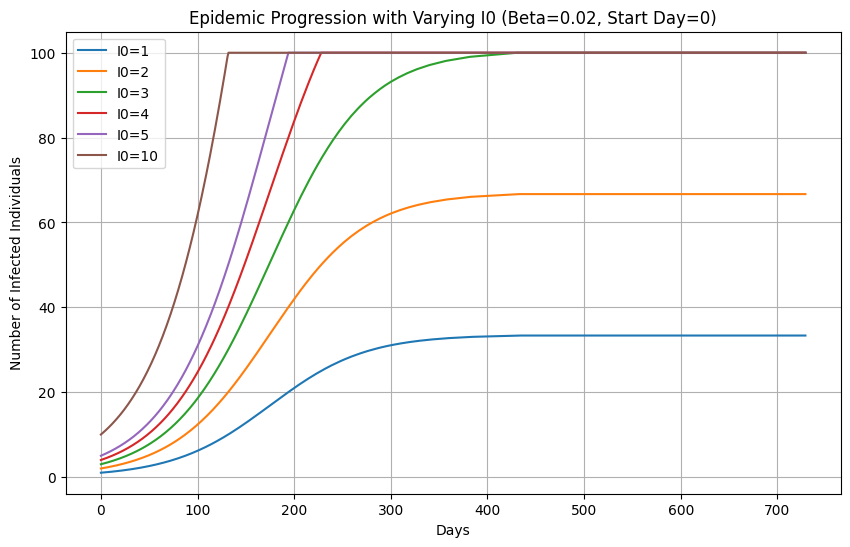

In [13]:
def simulate_epidemic(I0, beta, days_to_simulate, first_infection_day):

    days = np.arange(days_to_simulate)
    I = []
    I_0 = I0

    for i in range(days_to_simulate):

      if I_0 < 100:
        I.append((I_0))
        S.append(N-(I_0))

      if I_0 >= 100:
        I.append(100)
        S.append(0)


      I_0 = I_0 + I_0*beta*S[i]/N

    return days, I

# Vary parameters
I0_values = [1,2,3,4, 5, 10]
beta_values = [0.01, 0.015, 0.0175, 0.02, 0.0225, 0.025, 0.03,0.04]


days_to_simulate = 365*2

# --- Varying Beta ---
plt.figure(figsize=(10, 6))
for beta in beta_values:
    days, I = simulate_epidemic(I0=3, beta=beta, days_to_simulate = 365*2, first_infection_day=0)
    label = f'β={beta}'
    plt.plot(days, I, label=label)

plt.title('Epidemic Progression with Varying Beta (I0=3, Start Day=0)')
plt.xlabel('Days')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.grid(True)
plt.show()

# --- Varying Initial Infected (I0) ---
plt.figure(figsize=(10, 6))
for I0 in I0_values:
    days, I = simulate_epidemic(I0=I0, beta=0.02, days_to_simulate = 365*2, first_infection_day=0)
    label = f'I0={I0}'
    plt.plot(days, I, label=label)

plt.title('Epidemic Progression with Varying I0 (Beta=0.02, Start Day=0)')
plt.xlabel('Days')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.grid(True)
plt.show()


# 2.1 there is now a decrease after peak ! The curve looks more like a gaussian if the balance of beta to gamma lets people be recovered faster than the virus spreads. It seems bit beta=0.03 that gamma needs to be around 0.005 to have this recovery slope be present.


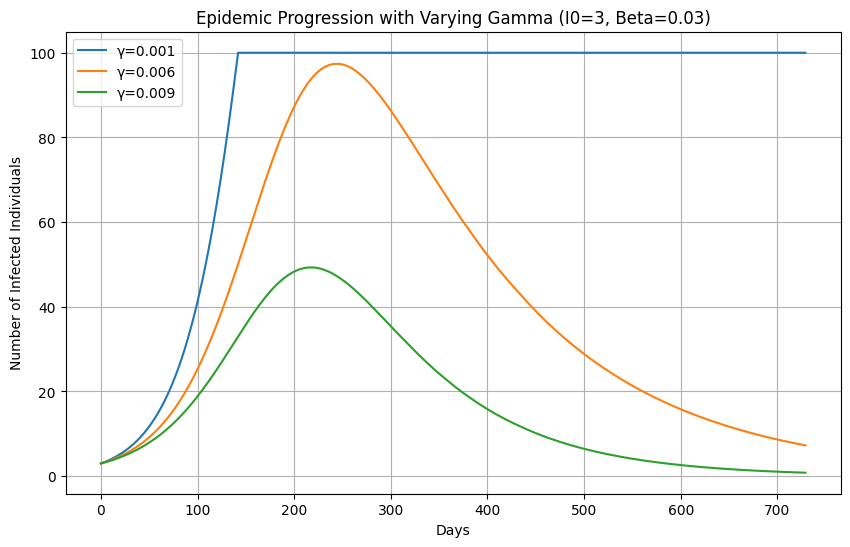

In [16]:
def simulate_epidemic_SIS(I0, beta, days_to_simulate, first_infection_day, gamma):

    days = np.arange(days_to_simulate)
    I = []
    I_0 = I0
    gamma = gamma

    for i in range(days_to_simulate):

      if I_0 < 100:
        I.append((I_0))
        S.append(N-(I_0))

      if I_0 >= 100:
        I.append(100)
        S.append(0)


      I_0 = I_0 + I_0*beta*S[i]/N - gamma*I_0

    return days, I

# Vary parameters
gamma_values=[0.001,0.006, 0.009]

days_to_simulate = 365*2
N=100
# --- Varying gamma ---
plt.figure(figsize=(10, 6))
for gamma in gamma_values:
    days, I = simulate_epidemic_SIS(I0=3, beta=0.03, days_to_simulate=365*2, first_infection_day=0, gamma=gamma)
    label = f'γ={gamma}'
    plt.plot(days, I, label=label)

plt.title('Epidemic Progression with Varying Gamma (I0=3, Beta=0.03)')
plt.xlabel('Days')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.grid(True)
plt.show()


# 2.2 SIS model an epidemic will occur if  R0>1 .  In other words, an epidemic can occur if an infected individual in an otherwise susceptible population will on average infect more than one other individual

#In the SIS model, after an epidemic occurs the population reaches an equilibrium between susceptible and infective individuals. The effective basic reproductive ratio of this steady-state population can be defined as  βS∗/γ, and with  S∗=γ/β  this ratio is evidently unity. S*=S/N . Clearly, for a population to be in equilibrium, an infective individual must infect on average one other individual before he or she recovers.





# starts to be a slope around ratio=2.5

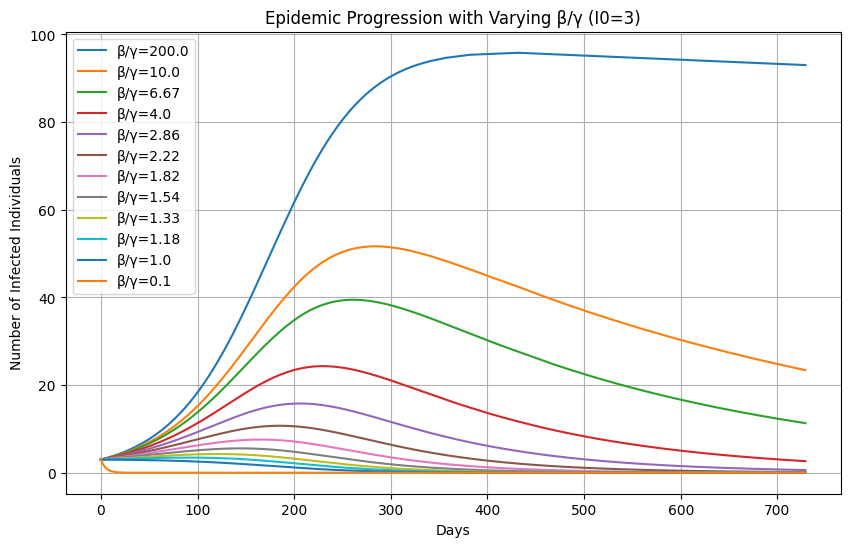

In [15]:
def simulate_epidemic_SIS(I0, beta, days_to_simulate, first_infection_day, gamma):

    days = np.arange(days_to_simulate)
    I = []
    I_0 = I0
    gamma = gamma

    for i in range(days_to_simulate):

      if I_0 < 100:
        I.append((I_0))
        S.append(N-(I_0))

      if I_0 >= 100:
        I.append(100)
        S.append(0)


      I_0 = I_0 + I_0*beta*S[i]/N - gamma*I_0

    return days, I

# Vary parameters
gamma_values=[0.0001,.002,0.003,0.005, 0.007,0.009, 0.011, 0.013, 0.015,0.017,0.02, 0.2]
beta_values = [0.02]

days_to_simulate = 365*2

# --- Varying gamma ---
plt.figure(figsize=(10, 6))
for gamma in gamma_values:
  for beta in beta_values:
    days, I = simulate_epidemic_SIS(I0=3, beta=beta, days_to_simulate=365*2, first_infection_day=0, gamma=gamma)
    label = f'β/γ={round(beta/gamma,2)}'
    plt.plot(days, I, label=label)

plt.title('Epidemic Progression with Varying β/γ (I0=3)')
plt.xlabel('Days')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.grid(True)
plt.show()
